author: [@sparshsah](https://github.com/sparshsah)

DISCLAIMER: I am not necessarily an expert in EITHER finance or investing in general OR any of the products I mention below. I am NOT a financial advisor, and this analysis is NOT financial advice NOR to be interpreted as such. As always, past investment performance CANNOT guarantee future results. I am simply presenting some data and doing some calculations on it. I CANNOT promise that my calculations are correct OR useful. Opinions, if and where present, are (a) my own and (b) NOT to be interpreted as financial advice. This is NOT a solicitation or offer to EITHER trade or take a position in any security, derivative, fund, or other asset, OR enter into any contract or other agreement. Before making any personal financial or investment decisions, consult with a qualified professional financial advisor about how to build a well-diversified and risk-managed portfolio that is best for you.

DISCLOSURES: Between 2018 and 2022, I was with AQR and worked on, among other things, styles research, including research that flowed into QSPNX, one of the products I mention below. I hold VMNFX in my personal portfolio. However, this analysis is not sponsored, commissioned, or vetted by any investment manager (including SSGA, AQR, or Vanguard); I have not and will not get paid for anything I say below; and I have no commercial interests in its publication, circulation, or results.

DATA SOURCES: SPY, QSPNX, QMNNX, and VMNFX live adjusted close price history is from Yahoo Finance.

# Setting

Styles are systematic, intuitive, and well-documented sources of expected returns uncorrelated with stock-, bond-, or commodity-market returns (often implemented using leverage, shorting, and/or derivatives). I will compare the live net-of-fee net-of-tcost performance of three styles-driven mutual funds available to individual investors in the US as of 2022-06-09.


## QSPNX, "AQR Style Premia Alternative Fund": AQR's Market-Neutral Stock-Selection-and-Global-Macro Styles Mutual Fund (N share class)
* [Offering documents](https://funds.aqr.com/funds/alternatives/aqr-style-premia-alternative-fund/qspnx)
* Profiles: [Morningstar](https://www.morningstar.com/funds/xnas/qspnx/quote), [Fidelity](https://fundresearch.fidelity.com/mutual-funds/view-all/00203H412)
### Fast facts:
* Manager: AQR
* Manager inception date: 1998 (24 years ago)
* Fund Category: Core liquid-alternative
* Fund target volatility: 10\%
* Fund inception date: 2013-10-30 (9 years ago)
* Fund AUM: \$943M
### Strategy:
* Four styles (Value, Momentum, Carry, and Defensive including Quality \& BAB) across five asset classes (Single-name stocks \& industries, Stock indices, Yield curve, Currencies, and Commodities).

## QMNNX, "AQR Equity Market Neutral Fund": AQR's Market-Neutral Stock-Selection-only Styles+Alpha Mutual Fund (N share class)
* [Offering documents](https://funds.aqr.com/funds/alternatives/aqr-equity-market-neutral-fund/qmnnx)
* Profiles: [Morningstar](https://www.morningstar.com/funds/xnas/qmnnx/quote)
### Fast facts:
* Manager: AQR
* Manager inception date: 1998 (24 years ago)
* Fund category: Liquid alternative
* Fund target volatility: 6\%
* Fund inception date: 2014-10-07
* Fund AUM: \$146M
### Strategy:
* Four styles (Value, Momentum, Carry, and Defensive including Quality \& BAB) in a single asset class (Single-name stocks \& industries).
* AQR Global Stock Selection team's market-neutral systematic alpha signals in single-name stocks \& industries.

## VMNFX, "Vanguard Market Neutral Fund": Vanguard's Market-Neutral Stock-Selection Mutual Fund (individual-investor share class)
- Offering documents for [advisors](https://advisors.vanguard.com/investments/products/vmnfx/vanguard-market-neutral-fund-investor-shares) and [investors](https://investor.vanguard.com/mutual-funds/profile/VMNFX)
- Profiles: [Morningstar](https://www.morningstar.com/funds/xnas/vmnfx/quote), [Fidelity](https://fundresearch.fidelity.com/mutual-funds/view-all/92205G104), [Two Sigma](https://www.venn.twosigma.com/vennsights/article/blog-post-alpha)
- Inception date: 1998-11-11
* Fund AUM: \$630M
VMNFX  is a liquid-alternative solution that invests in their Quantitative Equity Group's market-, industry-, and size-neutral systematic stock-selection signals (including but not limited to styles such as Value, Momentum, and Quality) in US large-, mid-, and small-cap single-name stocks. The fund appears to target around 7\% annualized volatility.

In [2]:
from importlib import reload
import sys
# https://github.com/sparshsah/foggy-lib/tree/main/util
sys.path.insert(0, "../../../foggy-lib/util")
del sys

In [7]:
import pandas as pd
import numpy as np
import foggy_pylib.core as fc
import foggy_pylib.fin as ff

In [39]:
reload(fc)
reload(ff)

<module 'foggy_pylib.fin' from '/Users/sparshsah/Documents/biz/foggyBASIS/sys/foggy-lib/util/foggy_pylib/fin.py'>

In [47]:
KIND = "geom"
TICKERS = ["SPY", "QSPNX", "QMNNX", "VMNFX"]

def _get_pnl(ticker="qspnx"):
    px = pd.read_csv(f"data/yahoo-finance_{ticker}_px.csv", index_col=0, parse_dates=True)["Adj Close"]
    pnl = ff._get_r_from_px(px=px, kind=KIND)
    return pnl

def get_pnl():
    pnl = {ticker: _get_pnl(ticker=ticker) for ticker in TICKERS}
    pnl = pd.DataFrame(pnl, columns=TICKERS)
    # ignore the stuff prior to the first active fund
    start_date = min(_pnl.first_valid_index() for ticker, _pnl in pnl.iteritems() if ticker != "spy")
    pnl = pnl.loc[start_date:, :]
    return pnl

In [48]:
pnl = get_pnl()
pnl

,SPY,QSPNX,QMNNX,VMNFX
Date,,,,
1993-02-01,0.007113,NaN,NaN,NaN
1993-02-02,0.002119,NaN,NaN,NaN
1993-02-03,0.010570,NaN,NaN,NaN
1993-02-04,0.004185,NaN,NaN,NaN
1993-02-05,-0.000695,NaN,NaN,NaN
...,...,...,...,...
2022-06-02,0.019043,-0.019916,-0.011841,-0.001645
2022-06-03,-0.016412,0.016043,0.005447,0.003295
2022-06-06,0.003045,-0.002105,0.000000,0.004105


In [41]:
t = fc.maybe_date(ow_lags=-5*261)
ff._get_est_corr_of_r(pnl.loc[t:, "vmnfx"], pnl.loc[t:, "qmnnx"], de_avg_kind=None)

0.5480855740753365

In [38]:
fc.dt.datetime.now()

datetime.datetime(2022, 6, 9, 15, 15, 22, 771434)

<AxesSubplot:xlabel='Date'>

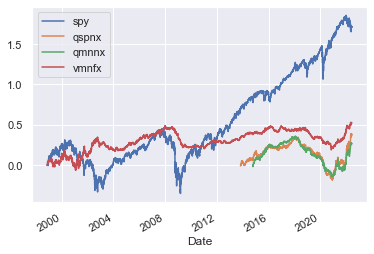

In [45]:
pnl.cumsum().plot()

<AxesSubplot:xlabel='Date'>

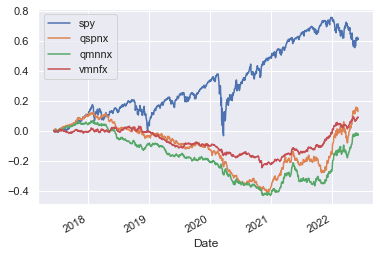

In [42]:
pnl.loc[t:, :].cumsum().plot()

In [44]:
ff.get_est_perf_stats_of_r(r=pnl.loc["2020Q3":, :])

,spy,qspnx,qmnnx,vmnfx
Sharpe,0.99,1.52,1.22,1.56
t-stat,1.36,2.08,1.67,2.13
ER,0.1668,0.2521,0.1643,0.129
Vol,0.168,0.1655,0.1346,0.0829
Frac valid timesteps,1,1,1,1
Total valid timesteps,489,489,489,489
Total timesteps,489,489,489,489
First timestep,2020-07-01 00:00:00,2020-07-01 00:00:00,2020-07-01 00:00:00,2020-07-01 00:00:00
First valid timestep,2020-07-01 00:00:00,2020-07-01 00:00:00,2020-07-01 00:00:00,2020-07-01 00:00:00
Last valid timestep,2022-06-08 00:00:00,2022-06-08 00:00:00,2022-06-08 00:00:00,2022-06-08 00:00:00
